In [2]:
import numpy as np
import matplotlib.pyplot as plt

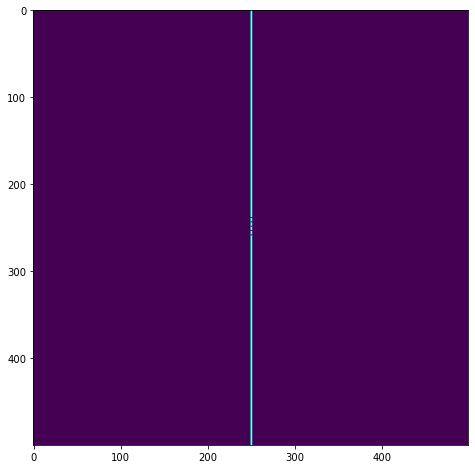

In [19]:
def barriers(N,n,a=1):
    '''
    N: Número de pontos do lado do grid (grid quadrado)
    n: Número de fendas
    a: Altura fenda
    '''
    
    grid = np.zeros((N,N))
    center_g = N//2
    x    = np.linspace(-10, 10, N)    # nodos da grelha no espaço
    dx   = x[1] - x[0] 

    cons = (2*int(N/300))
    grid[:,center_g:center_g+(a+1)] = 1
    #grid[:,:] = 1
    if n == 1:
        grid[center_g-2:center_g+3,center_g:center_g+(a+1)] = 0
    if n%2==0:
        grid[center_g-2-5*(n-2):center_g+3+5*(n-2):5 , : ] = 0
            
    
                
    return grid  
        
    
grid = barriers(500,4,1)
plt.figure(figsize=(14,8))
plt.imshow(grid)
plt.show()

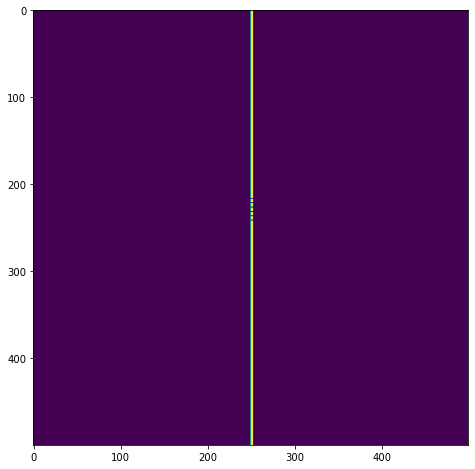

In [33]:
def barriers(N,n,a=1):
    '''
    N: Número de pontos do lado do grid (grid quadrado)
    n: Número de barreiras
    a: Altura barreiras
    '''

    #N = 41 # number of points xx
    grid = np.zeros((N,N))
    center_g = N//2
    x    = np.linspace(-10, 10, N)    # nodos da grelha no espaço
    dx   = x[1] - x[0] 
    
    
    
    cons = (2*int(N/300))
    grid[:,center_g:center_g+(a*cons+1)] = 1
    if n==1:
        grid[center_g-2*cons:center_g+3*cons ,center_g:center_g+a*cons+1] = 0
        
        return grid
        
    if n%2==0:
        nm = n//2
        grid[center_g-(2+(nm+(nm-1))*5)*cons:center_g-3*cons:5, center_g:center_g+a*cons+1] = 0
        #grid[center_g-(2-(nm+(nm-1))*5)*cons:center_g-3*cons, center_g:center_g+a*cons+1] = 0
        
        return grid
        
        
        
    for i in range(n):
        if i==0:
            grid[center_g-7*cons*(i+1):center_g-1*cons*(i+1),center_g:center_g+(a*cons+1)] = 0
            grid[center_g+2*cons*(i+1):center_g+8*cons*(i+1),center_g:center_g+(a*cons+1)] = 0
            
            left_bar = center_g-7*cons*(i+1)
            right_bar = center_g+8*cons*(i+1)
        else:
            if center_g-(7-10*i)*cons >=11: # So that we stay inside the grid
                grid[center_g-(7-10*i)*cons:center_g-(1-11*i)*cons,center_g:center_g+(a*cons+1)] = 0
                grid[center_g+(2+10*i)*cons:center_g+(8+10*i)*cons,center_g:center_g+(a*cons+1)] = 0
                left_bar = center_g-(7-10*i)*cons
                right_bar = center_g+(8+10*i)*cons
            else:
                print('The number of barriers exceeds the grid size')
                break

                
    grid[0:left_bar-4*cons,center_g:center_g+(a*cons+1)] = 1
    grid[right_bar+5*cons:,center_g:center_g+(a*cons+1)] = 1
                
    return grid  
        
    
grid = barriers(500,4,1)
plt.figure(figsize=(14,8))
plt.imshow(grid)
plt.show()

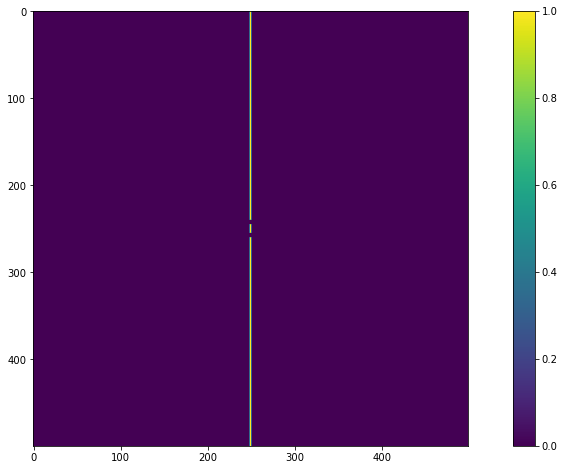

In [63]:
def n_fendas(N,l,espessura,largura,separacao,n):
    grid = np.zeros([N,N])
    m = int(N/l)
    cc = l//2 #center
    
    if l<((n-1)*separacao + n*largura)/m:
        print("Não é possivel ter {} fendas.".format(n))
    else:
        grid[:,int(N/2 - espessura/2):int(N/2 + espessura/2)] = 1
        if n%2!=0:
            grid[int(m*cc - largura/2):int(m*cc + largura/2),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
            for i in range(int((n-1)/2)):
                i = i+1
                if i == 1:
                    grid[int(m*cc + largura/2 + separacao):int(m*cc + largura/2 + separacao + largura),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
                    grid[int(m*cc - largura/2 - separacao - largura):int(m*cc - largura/2 - separacao),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
                else:
                    grid[int(m*cc + i*(separacao + largura) - largura/2):int(m*cc + i*(separacao + largura) + largura/2),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
                    grid[int(m*cc - i*(separacao + largura) - largura/2):int(m*cc - i*(separacao + largura) + largura/2),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
    
        else:
            for i in range(int(n/2)):
                i = i+1
                if i == 1:
                    grid[int(m*cc+separacao/2):int(m*cc+separacao/2+largura),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
                    grid[int(m*cc-separacao/2-largura):int(m*cc-separacao/2),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
                else:
                    grid[int(m*cc + i*(separacao + largura) - separacao/2 - largura):int(m*cc + i*(separacao + largura) -separacao/2),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
                    grid[int(m*cc - i*(separacao + largura) + separacao/2):int(m*cc - i*(separacao + largura) + separacao/2 + largura),int(N/2 - espessura/2):int(N/2 + espessura/2)] = 0
        
        
    return grid

matriz_potencial = potencial_fendas(500,20,2,5,10,2)
plt.figure(figsize=(16,8))
plt.imshow(matriz_potencial)
plt.colorbar()
plt.show()

In [ ]:
def barriers(N,n,a=1):
    '''
    N: Número de pontos do lado do grid (grid quadrado)
    n: Número de barreiras
    a: Altura barreiras
    '''

    #N = 41 # number of points xx
    grid = np.zeros((N,N))
    center_g = N//2
    x    = np.linspace(-10, 10, N)    # nodos da grelha no espaço
    dx   = x[1] - x[0] 

    cons = (2*int(N/300))
    if n==1:
        grid[center_g-2*cons:center_g+3*cons ,center_g:center_g+a*cons+1] = 1
        
        grid[0:center_g-6*cons,center_g:center_g+(a*cons+1)] = 1
        grid[center_g+8*cons:,center_g:center_g+(a*cons+1)] = 1
        
        return grid
        
    
    
    n_ = n//2 # number of barriers for each side
    for i in range(n_):
        if i==0:
            grid[center_g-7*cons*(i+1):center_g-1*cons*(i+1),center_g:center_g+(a*cons+1)] = 1
            grid[center_g+2*cons*(i+1):center_g+8*cons*(i+1),center_g:center_g+(a*cons+1)] = 1
            
            left_bar = center_g-7*cons*(i+1)
            right_bar = center_g+8*cons*(i+1)
        else:
            if center_g-(7-10*i)*cons >=11: # So that we stay inside the grid
                grid[center_g-(7-10*i)*cons:center_g-(1-11*i)*cons,center_g:center_g+(a*cons+1)] = 1
                grid[center_g+(2+10*i)*cons:center_g+(8+10*i)*cons,center_g:center_g+(a*cons+1)] = 1
                left_bar = center_g-(7-10*i)*cons
                right_bar = center_g+(8+10*i)*cons
            else:
                print('The number of barriers exceeds the grid size')
                break

                
    grid[0:left_bar-4*cons,center_g:center_g+(a*cons+1)] = 1
    grid[right_bar+5*cons:,center_g:center_g+(a*cons+1)] = 1
                
    return grid 

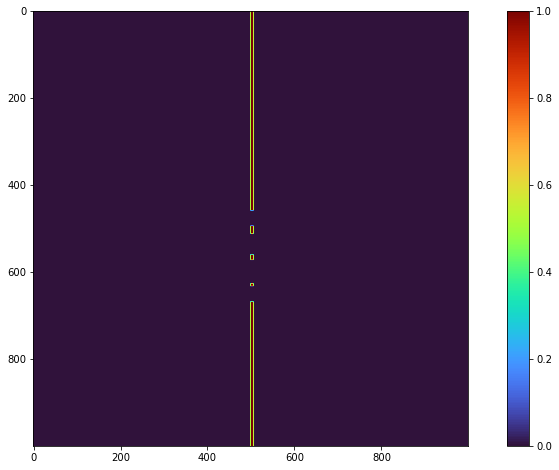

In [74]:
def barriers(N,n,a=1):
    '''
    N: Número de pontos do lado do grid (grid quadrado)
    n: Número de barreiras
    a: Altura barreiras
    '''

    #N = 41 # number of points xx
    grid = np.zeros((N,N))
    center_g = N//2
    x    = np.linspace(-10, 10, N)    # nodos da grelha no espaço
    dx   = x[1] - x[0] 

    cons = (2*int(N/300))
    grid[: ,center_g:center_g+a*cons+1] = 1
    if n==1:
        grid[center_g-2*cons:center_g+3*cons ,center_g:center_g+a*cons+1] = 0
        
        #grid[0:center_g-6*cons,center_g:center_g+(a*cons+1)] = 1
        #grid[center_g+8*cons:,center_g:center_g+(a*cons+1)] = 1
        
        return grid
        
    
    
    n_ = n//2 # number of barriers for each side
    for i in range(n_):
        if i==0:
            grid[center_g-7*cons*(i+1):center_g-1*cons*(i+1),center_g:center_g+(a*cons+1)] = 0
            grid[center_g+2*cons*(i+1):center_g+8*cons*(i+1),center_g:center_g+(a*cons+1)] = 0
            
            left_bar = center_g-7*cons*(i+1)
            right_bar = center_g+8*cons*(i+1)
        else:
            if center_g-(7-10*i)*cons >=11: # So that we stay inside the grid
                grid[center_g-(7-10*i)*cons:center_g-(1-11*i)*cons,center_g:center_g+(a*cons+1)] = 0
                grid[center_g+(2+10*i)*cons:center_g+(8+10*i)*cons,center_g:center_g+(a*cons+1)] = 0
                left_bar = center_g-(7-10*i)*cons
                right_bar = center_g+(8+10*i)*cons
            else:
                print('The number of barriers exceeds the grid size')
                break

                
    #grid[0:left_bar-4*cons,center_g:center_g+(a*cons+1)] = 1
    #grid[right_bar+5*cons:,center_g:center_g+(a*cons+1)] = 1
                
    return grid

grid = barriers(1000,6)
plt.figure(figsize=(14,8))
plt.imshow(grid,cmap='turbo')

plt.colorbar()
plt.show()